# Modelos de Regressão: Parte 03

* Regressão linear simples x Multipla:

Quanto tratamos de regressão linear simples, verificamos o comportamento de uma variável em função de outra. Quando tratamos de regressão linear multipla, o modelo será composto por uma série de variáveis que possuem coeficientes lineares.

$$ y = \beta_0 + \sum \beta_i $$

* Interpretação de modelos de regressão linear (F e p-valor):

1. Teste F:

Verificamos questões como: O modelo é util para predizer o preço?

2. p-valor:

Verificamos neste caso quais variáveis possuem relação estatísitca com o preço.

3. $R^2$:

Medida de quanto da variabilidade dos target é explicada pelo modelo.

Além dessas métricas, os coeficientes também são variáveis relevantes pois estes foram otimizados minizando os desvios entre os dados reais e as predições do modelo.

Interpretação do `p-valor`:

Um pequeno p-valor indica que existe uma associação entre o preditor e a resposta.

* Regressão Linear Multipla:

In [129]:
import pandas as pd
df = pd.read_csv('data/case01/boston_house_prices.csv')
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Neste momento tentaremos criar um modelo com incluindo varias variaveis para a construcao do modelo.

In [130]:
x = df.iloc[:,:-1]
y = df['MEDV']

In [131]:
# Escrevendo o modelo com StatModels
import statsmodels.api as st
Xc = st.add_constant(x)
modelo = st.OLS(y, Xc).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          6.72e-135
Time:                        05:20:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

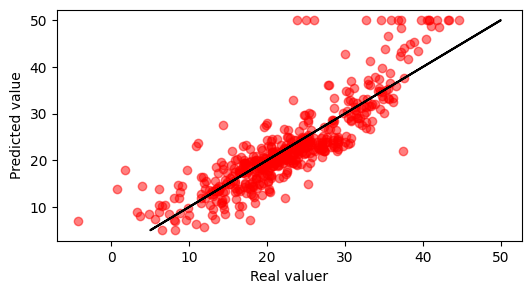

In [132]:
y_pred01 = modelo.predict(Xc)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.scatter(y_pred01, df['MEDV'], color ='red', alpha=0.5)
plt.plot(df['MEDV'], df['MEDV'], color = 'black')
plt.xlabel('Real valuer')
plt.ylabel('Predicted value')
plt.show()

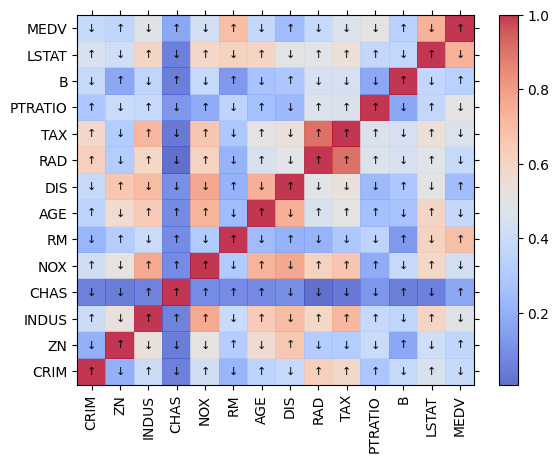

In [133]:
import numpy as np
def visualize_correlation_matrix(data, hurdle=0.0, num = False):
    variables = data.columns
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0

    heatmap = plt.pcolor(np.abs(R), cmap='coolwarm', alpha=0.8)

    heatmap.axes.set_frame_on(True)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off')

    if num:
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i, j] != 0:  # Ignora valores nulos
                    # Escolha da seta
                    arrow = '↑' if R[i, j] > 0 else '↓'

                    # Adicionando a seta
                    plt.text(j+0.5, i+0.5, arrow,
                             ha='center', va='center', color='black', fontsize=8)


    plt.colorbar()
    plt.show()

visualize_correlation_matrix(df, hurdle = 0.001, num = True)

In [134]:
# Podemos aplicar os conceitos de autovalores e autovetores para identificar os problemas de 
# multicolinearidade.

corr = np.corrcoef(df, rowvar = 0)
values, eigenvectors = np.linalg.eig(corr)
autovalores.min()

0.06032665820743602

In [135]:
np.abs(eigenvectors[:,8])

array([0.05911418, 0.09629681, 0.23547288, 0.02348897, 0.08764915,
       0.00719052, 0.03822703, 0.04712403, 0.63497533, 0.69882219,
       0.05573816, 0.01616528, 0.08314379, 0.13412718])

In [136]:
print(df.columns[2],df.columns[8],df.columns[9])

INDUS RAD TAX


Agora que sabemos quais variáveis contribuem para muilticolinearidade, podemos tratar destas de forma mais eficiente.

In [137]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

In [138]:
# Para padronização
scaler = StandardScaler()
# Criando o modelo
model = linear_model.LinearRegression(fit_intercept=True)
# Criando o pipeline
model_pipe = make_pipeline(scaler, model)
# Treinando o modelo
model_pipe.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [139]:
model_pipe.steps[1][1].coef_

array([-0.92814606,  1.08156863,  0.1409    ,  0.68173972, -2.05671827,
        2.67423017,  0.01946607, -3.10404426,  2.66221764, -2.07678168,
       -2.06060666,  0.84926842, -3.74362713])

In [140]:
# Verificando os coeficientes das variaveis

for coef, var in sorted(zip(map(abs,model_pipe.steps[1][1].coef_),df.columns[:-1]),reverse=True):
    print(f'Variável: {var} - {coef:.3f}')

Variável: LSTAT - 3.744
Variável: DIS - 3.104
Variável: RM - 2.674
Variável: RAD - 2.662
Variável: TAX - 2.077
Variável: PTRATIO - 2.061
Variável: NOX - 2.057
Variável: ZN - 1.082
Variável: CRIM - 0.928
Variável: B - 0.849
Variável: CHAS - 0.682
Variável: INDUS - 0.141
Variável: AGE - 0.019


In [143]:
y_pred = model_pipe.predict(x)
def metrics(y_pred,y_real):
    return r2_score(y_real, y_pred)

print(f'R2 = {metrics(y_pred,y)*100:.3f} % ')

R2 = 74.064 % 
